In [1]:

# ------------    Load Dataset & Libraries    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# Loading Dataset
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset


# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies.Film = movies.Film.astype("category") # use assignment '=' to update the dataset
movies.Genre = movies.Genre.astype("category")   
movies.Year = movies.Year.astype("category")   
movies.info()   # check the data-type changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


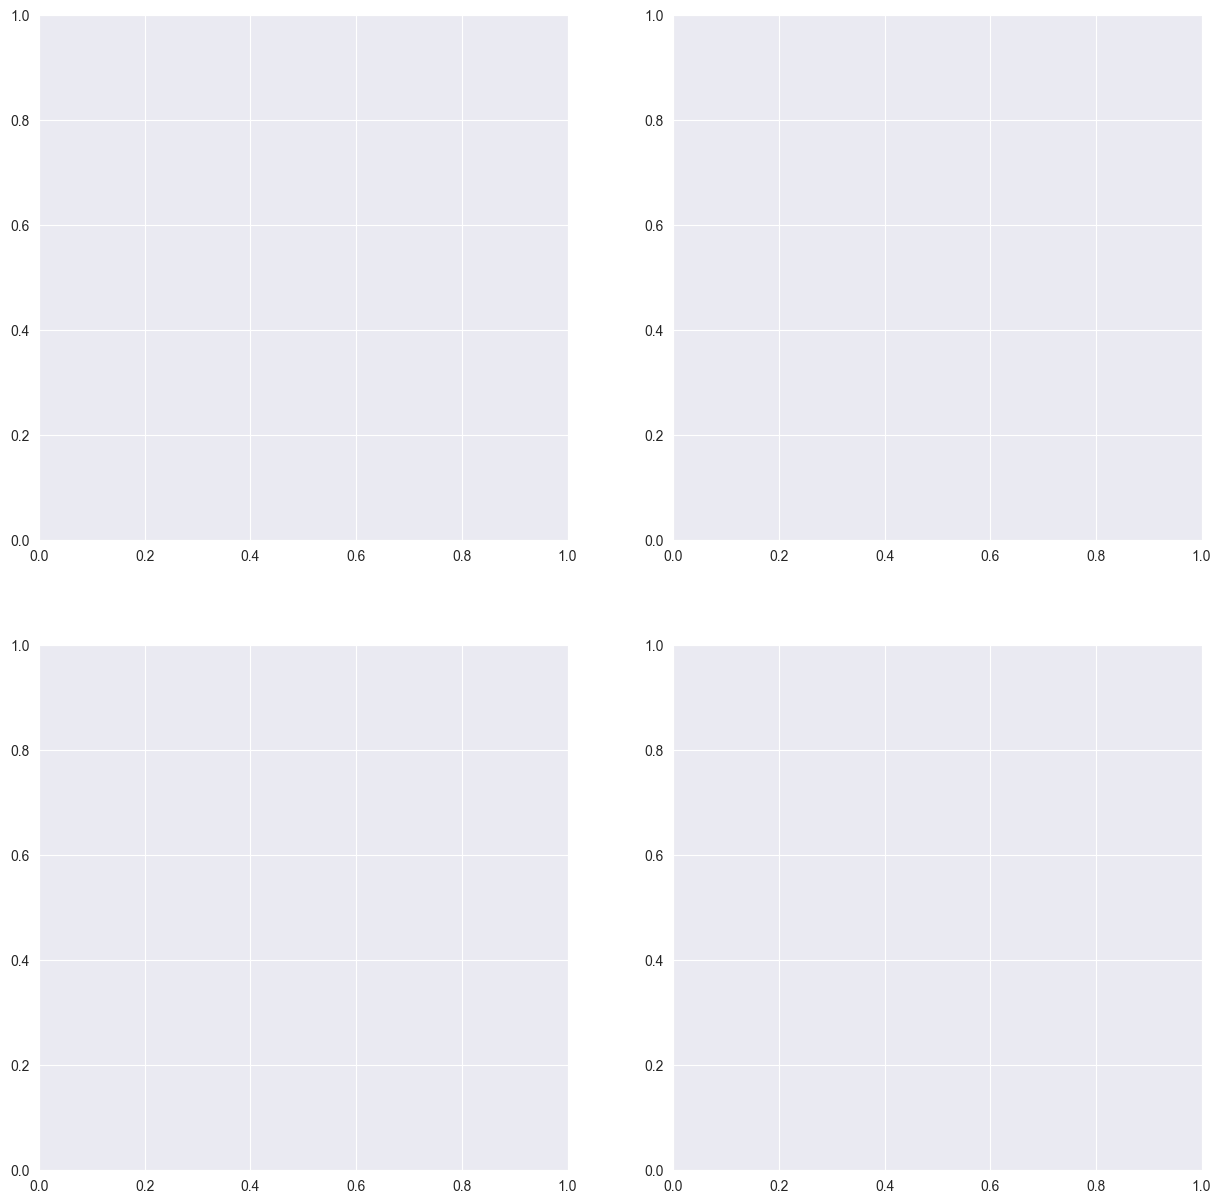

In [2]:

# In this section we'll use "subplot" to create a 'Dashboard'
    # we'll populate those dashboard with different types of chart
    # we'll use a 2x2 subplot

sns.set_style('darkgrid')   # change style
dshBd, axes = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot
# Note: we don't use 'sharex', 'sharey' at the first try, 
    # because we need to view all different plots first


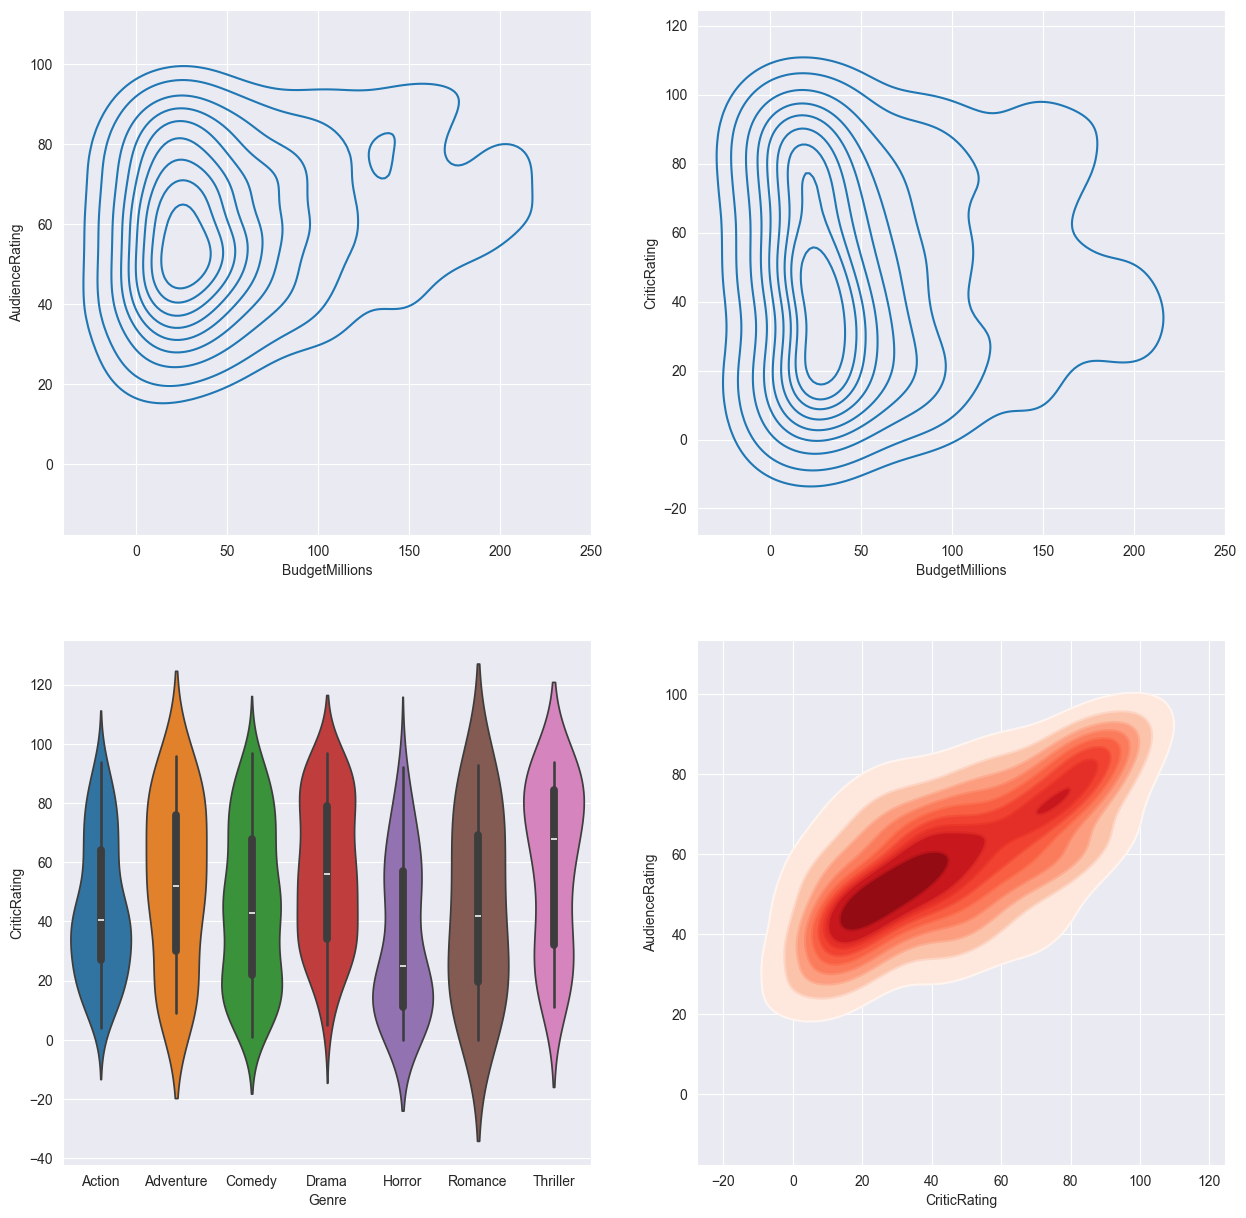

In [5]:

sns.set_style('darkgrid')   # change style
dshBd, axes = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot
# Note: we don't use 'sharex', 'sharey' at the first try, 
    # because we need to view all different plots first


# kdeplot: 
    # BudgetMillions' vs 'AudienceRating'
    # BudgetMillions' vs 'CriticRating'
    # notice 2D indexes used

k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0, 0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[0, 1])
k_BA.set(xlim=(-40, 250))   # setting the RANGE for k_BA
k_BC.set(xlim=(-40, 250))   # setting the RANGE for k_BC
# We use k_BC "k_BC.set(xlim=(-20, 160))" but it can be done with 'subplots' attribute "sharex"
    # the reason is: we have different kind of plots, so we do it manually


# violinplot: we put violinplot at (1, 0)
vlp_1 = sns.violinplot(data=movies, x='Genre', y='CriticRating', hue='Genre', ax=axes[1, 0])

# kdeplot (shaded): CriticRating vs AudienceRating at (1, 1) i.e. ax=axes[1, 1]
    # combine 'shades' & 'border'  to get a overlaied plot
    # notice we also used ax=axes[1, 1] for the outlines 'kDe2'
    # we put two plots in one plotting space (overlaying)
# if we dont specify the axes, the plots will be added to the last subplot
kDe1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1, 1])
kDe2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds', ax=axes[1, 1]) # ads border on top of 'kDe5'
# kDe2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds', ax=axes[0, 0]) # ads border on top of 'kDe5'
